# Regression Technique

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('50_Startups.csv')

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
# Divide the data into X vs  Y (dependent vs independent  variable)
X= df.iloc[:,0].values
Y =df.iloc[:,-1].values

In [13]:
X

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [15]:
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

#  Train_Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.2)

In [18]:
len(X_train)

40

In [21]:
len(X_test)

10

# Reshape the X variable

In [23]:
X_train  = X_train.reshape(-1,1)
X_test  = X_test.reshape(-1,1)

# Feature Scalling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating regreesion Sklearn

# Website 
Linear Regression --Scikit 1.5.1

In [27]:
# Creating  the LR Model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

# Predictions

In [29]:
## Predictions
y_pred = reg.predict(X_test)

In [31]:
y_pred

array([129016.0833776 ,  51407.00898733, 101956.21316223,  75106.97710223,
       151074.80834406, 115109.06972339,  52494.6667146 , 107244.72210377,
       135671.48603051, 113690.94581667])

In [33]:
Y_test

array([141585.52,  14681.4 ,  97483.56,  90708.19, 152211.77, 108552.04,
        49490.75, 108733.99, 146121.95, 105733.54])

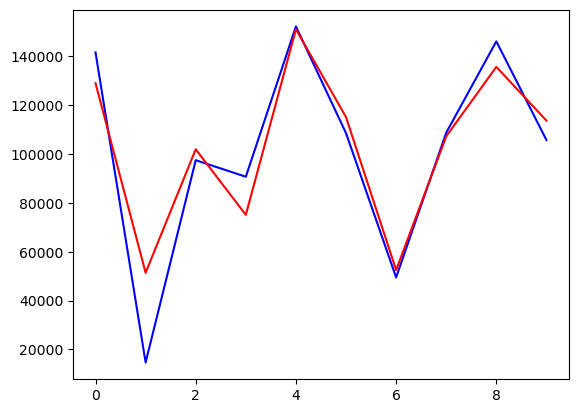

In [37]:
# Plotting predicted  vs actual test data
plt.plot(Y_test,color='blue',label='test')
plt.plot(y_pred,color= 'red',label='predictions')
plt.show()

In [39]:
# Regression Metrix

from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, y_pred)

9996.39574460531

## Predicting for  a new record

In [41]:
data = [[235000]]
new_df = pd.DataFrame(data)
new_df = sc.transform(new_df)
single = reg.predict(new_df)
print(single)

[245711.33287928]


# Multiple Linear Regreesion 

 # All columns in the  table

# State into Feature Encoding

In [43]:
df_dummies = pd.get_dummies(df,drop_first=True)

In [45]:
df_dummies.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [47]:
## Dividing  the data into X & Y 
X_mlr = df_dummies.drop(['Profit'],axis = 1)
Y_mlr = df_dummies.Profit

In [49]:
X_mlr.head(5)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


## Train And Test Split 

In [51]:
## Train Test Split 

from sklearn.model_selection import train_test_split
X_train_mlr,X_test_mlr,Y_train_mlr,Y_test_mlr = train_test_split(X_mlr,Y_mlr, test_size= 0.2)

# Feature Scaling 

In [53]:
## Features Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_mlr =sc.fit_transform(X_train_mlr)
X_test_mlr= sc.transform(X_test_mlr)

# Creating the MLR Model

In [55]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(X_train_mlr,Y_train_mlr)

LinearRegression()

In [59]:
y_pred2 = reg2.predict(X_test_mlr)

## regression Metrics

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test_mlr,y_pred2)

6393.337911070158

In [65]:
# Correlation 
corr_matrix = df_dummies.corr()['Profit']


In [67]:
corr_matrix

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
State_Florida      0.116244
State_New York     0.031368
Name: Profit, dtype: float64

# multiple Linear Regression - Removing  the Unwanted Columns

In [70]:
df_dummies.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [72]:
## Dividing the data into X & y
X_mlr2= df_dummies.drop(['Profit', 'Administration','State_Florida','State_New York'],axis = 1)
Y_mlr2= df_dummies.Profit

In [76]:
# Train  Test Split
from sklearn.model_selection import train_test_split
X_train_mlr2,X_test_mlr2,Y_train_mlr2,Y_test_mlr2 = train_test_split(X_mlr2,Y_mlr2, test_size= 0.2)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_mlr2 =sc.fit_transform(X_train_mlr2)
X_test_mlr2 = sc.transform(X_test_mlr2)

In [84]:
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()
reg3.fit(X_train_mlr2,Y_train_mlr2)

LinearRegression()

In [92]:
y_pred3 = reg3.predict(X_test_mlr2)

In [94]:
# Regression Metrics
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test_mlr2,y_pred3)

4882.785658842619

In [96]:
X_mlr2

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42
5,131876.90,362861.36
6,134615.46,127716.82
7,130298.13,323876.68
8,120542.52,311613.29
9,123334.88,304981.62
